# Machine Learning for Informing Climate Change through Salinity

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Read data
df = pd.read_csv('CalCOFI.csv')
df.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NH3uM,C14As1,C14As2,DarkAs,LightP,Year
0,0,33.418,NaN,24.287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
1,10,33.419,NaN,24.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
2,20,33.420,NaN,24.318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
3,30,33.400,NaN,24.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
4,40,33.380,NaN,24.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980


In [3]:
df.info()  # to get the basic meta data about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325281 entries, 0 to 325280
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  325281 non-null  int64  
 1   Salnty  322011 non-null  float64
 2   O2ml_L  298924 non-null  float64
 3   STheta  319771 non-null  float64
 4   O2Sat   298317 non-null  float64
 5   Oxymol  298311 non-null  float64
 6   ChlorA  208452 non-null  float64
 7   Phaeop  208449 non-null  float64
 8   PO4uM   289656 non-null  float64
 9   SiO3uM  290529 non-null  float64
 10  NO2uM   288191 non-null  float64
 11  NH3uM   64962 non-null   float64
 12  C14As1  14432 non-null   float64
 13  C14As2  14414 non-null   float64
 14  DarkAs  22649 non-null   float64
 15  LightP  18651 non-null   float64
 16  Year    325281 non-null  int64  
dtypes: float64(15), int64(2)
memory usage: 42.2 MB


In [4]:
df.describe()  # statistical measures for the features

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NH3uM,C14As1,C14As2,DarkAs,LightP,Year
count,325281.000000,322011.000000,298924.000000,319771.000000,298317.000000,298311.000000,208452.000000,208449.000000,289656.000000,290529.000000,288191.000000,64962.000000,14432.000000,14414.000000,22649.000000,18651.000000,325281.000000
mean,165.101276,33.702536,3.758934,25.689539,62.635062,163.631172,0.441257,0.191016,1.470320,25.523704,0.041113,0.084877,9.757704,9.762613,0.155295,18.356509,1997.299581
std,194.020553,0.403450,1.977190,1.342640,35.692365,86.217139,1.158695,0.281630,0.987115,25.492037,0.102868,0.273061,23.983492,25.064529,0.224953,29.852839,10.445387
min,0.000000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,-0.001000,-3.890000,0.000000,0.000000,0.000000,0.000000,-0.240000,-0.200000,-0.010000,0.000000,1980.000000
25%,32.000000,33.390000,2.040000,24.857000,30.800000,88.742000,0.050000,0.050000,0.410000,3.100000,0.000000,0.000000,0.930000,0.930000,0.060000,0.280000,1988.000000
50%,100.000000,33.668000,3.970000,25.806000,62.600000,172.421000,0.160000,0.110000,1.460000,17.420000,0.010000,0.000000,2.600000,2.600000,0.100000,1.800000,1997.000000
75%,250.000000,34.071000,5.690000,26.545035,101.000000,247.941800,0.390000,0.230000,2.300000,40.800000,0.030000,0.060000,8.000000,8.056500,0.174000,24.000000,2006.000000
max,4442.000000,37.034000,11.130000,250.784000,214.100000,485.701800,66.110000,10.660000,5.210000,181.600000,8.190000,15.630000,584.500000,948.300000,6.900000,99.900000,2016.000000


In [5]:
df[df.duplicated()].shape[0]/df.shape[0]  # Percentage of duplicated data

0.003083487815150593

Since the percentage of duplicate data is very low (lower than 0.01%), they can be removed.

In [6]:
df = df[~df.duplicated()]  # Removes duplicate rows

In [7]:
df.isna().sum()/df.shape[0]*100  # Percentage of null values in each feature

Depthm     0.000000
Salnty     0.888435
O2ml_L     7.892302
STheta     1.546821
O2Sat      8.079487
Oxymol     8.081338
ChlorA    35.722436
Phaeop    35.723361
PO4uM     10.724440
SiO3uM    10.455227
NO2uM     11.129340
NH3uM     79.967189
C14As1    95.549498
C14As2    95.555048
DarkAs    93.015561
LightP    94.248453
Year       0.000000
dtype: float64

# Data Exploration

Pearson’s correlation coefficient between Depthm and Salnty: 0.71
Pearson’s correlation coefficient between O2ml_L and Salnty: -0.91
Pearson’s correlation coefficient between STheta and Salnty: 0.68
Pearson’s correlation coefficient between O2Sat and Salnty: -0.9
Pearson’s correlation coefficient between Oxymol and Salnty: -0.91
Pearson’s correlation coefficient between ChlorA and Salnty: -0.07
Pearson’s correlation coefficient between Phaeop and Salnty: -0.05
Pearson’s correlation coefficient between PO4uM and Salnty: 0.9
Pearson’s correlation coefficient between SiO3uM and Salnty: 0.87
Pearson’s correlation coefficient between NO2uM and Salnty: -0.2
Pearson’s correlation coefficient between NH3uM and Salnty: -0.12
Pearson’s correlation coefficient between C14As1 and Salnty: 0.2
Pearson’s correlation coefficient between C14As2 and Salnty: 0.19
Pearson’s correlation coefficient between DarkAs and Salnty: 0.14
Pearson’s correlation coefficient between LightP and Salnty: -0.03
Pearson’s 

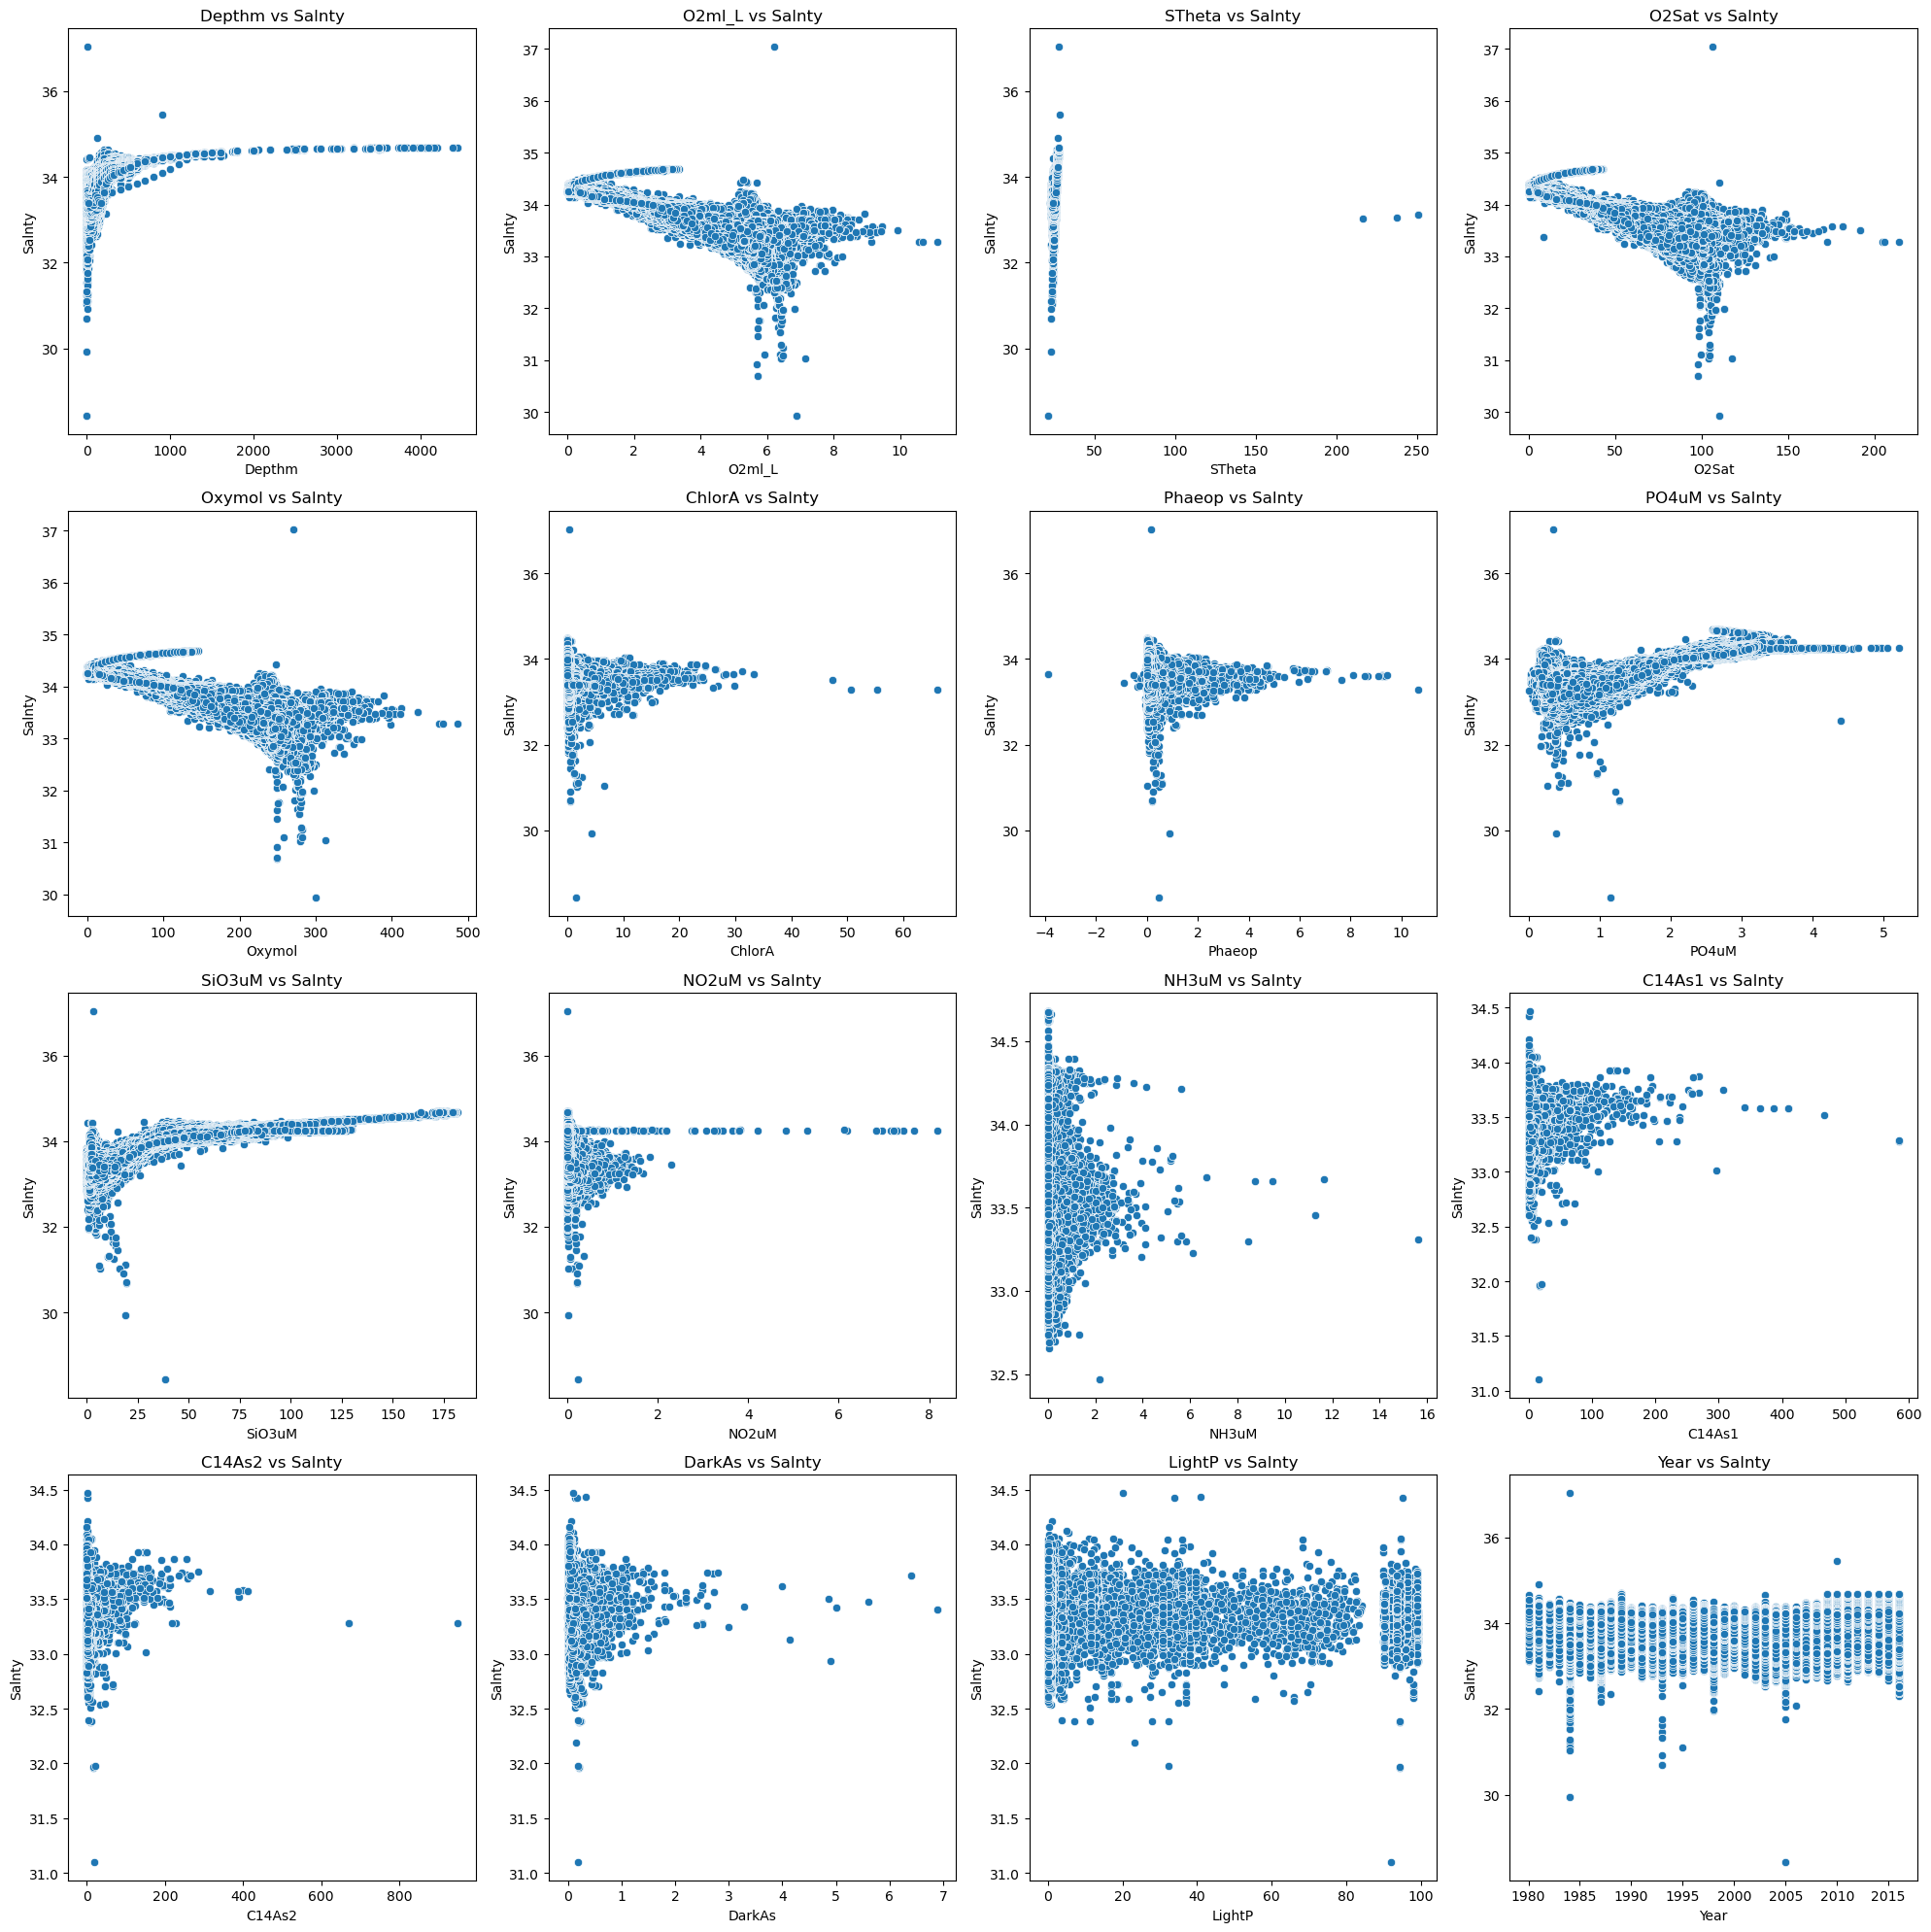

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Subplots of size 4x4
axes = axes.flatten()  # Flattening axes for easier traversal through iterations

cols = list(df.columns)  # List of all the columns
target_col = "Salnty"  # Name of the target column
cols.remove(target_col)  # Update to contain only the list of features

positively_corr_features = []  # List to store features with high positive correlation
negatively_corr_features = []  # List to store features with high(/low) negative correlation

for i, col in enumerate(cols):
    temp_df = df[[col, target_col]]  # Choose only the appropriate columns
    temp_df = temp_df.dropna()  # Removal of null values for that specific columns
    
    corr_coef = round(np.corrcoef(temp_df[col], temp_df[target_col])[0][1], 2)  # Compute Pearsons correlation coefficient

    # If correlation value is greater than 0.5, then the feature is added to 
    # high positive correlation feature list. Else if correlation value is 
    # less than -0.5, then the feature is added to negative positive correlation feature list
    
    if corr_coef > 0.5:
        positively_corr_features.append((col, corr_coef))
    elif corr_coef < -0.5:
        negatively_corr_features.append((col, corr_coef))
    print(f"Pearson’s correlation coefficient between {col} and {target_col}: {corr_coef}")
    
    sns.scatterplot(data = temp_df, x=temp_df[col], y=temp_df[target_col], ax=axes[i])  # Scatter plot of feature vs outcome
    axes[i].set_title(f"{col} vs {target_col}")

# fig.suptitle("Scatterplots between Chemical Oceanographic Measurements and Salinity")
plt.tight_layout()
plt.show()

In [9]:
positively_corr_features

[('Depthm', 0.71), ('STheta', 0.68), ('PO4uM', 0.9), ('SiO3uM', 0.87)]

From the correlation coefficient values, we can see that the features `Depthm`, `STheta`, `Po4um` and `SiO3um` are positively correlated with the outcome `Salnty` with very high correlation values. From this we can see that these features can be used in a model, as they have high predictive capability.

However from the plots, its also visible that the relationship is not strictly linear, There is non-linear relationship between these features and the outcome. For `STheta` feature, we can also see that there are three outliers, which might impact the correlation score. Further look into it might lead to more insights about this particular feature.

In [10]:
negatively_corr_features

[('O2ml_L', -0.91), ('O2Sat', -0.9), ('Oxymol', -0.91)]

Similarly, there are three features, `O2ml_L`, `O2Sat` and `Oxymol` who have a negative relationship with the outcome, `Salnty`. But all of them have very low correlation value close to -1, indicating their high effect on the outcome. 

One strange finding from the plots is that all three of these have exactly similar distribution of values although their range differs. There is a high possibility of these features being correlated with each other. This might cause multicollinearity in the model. A correlation value between these features can help us identify the multicollinearity in the dataset, if present.

In [11]:
corr_matrix_df = df[cols].corr()  # Constructing the correlation matrix

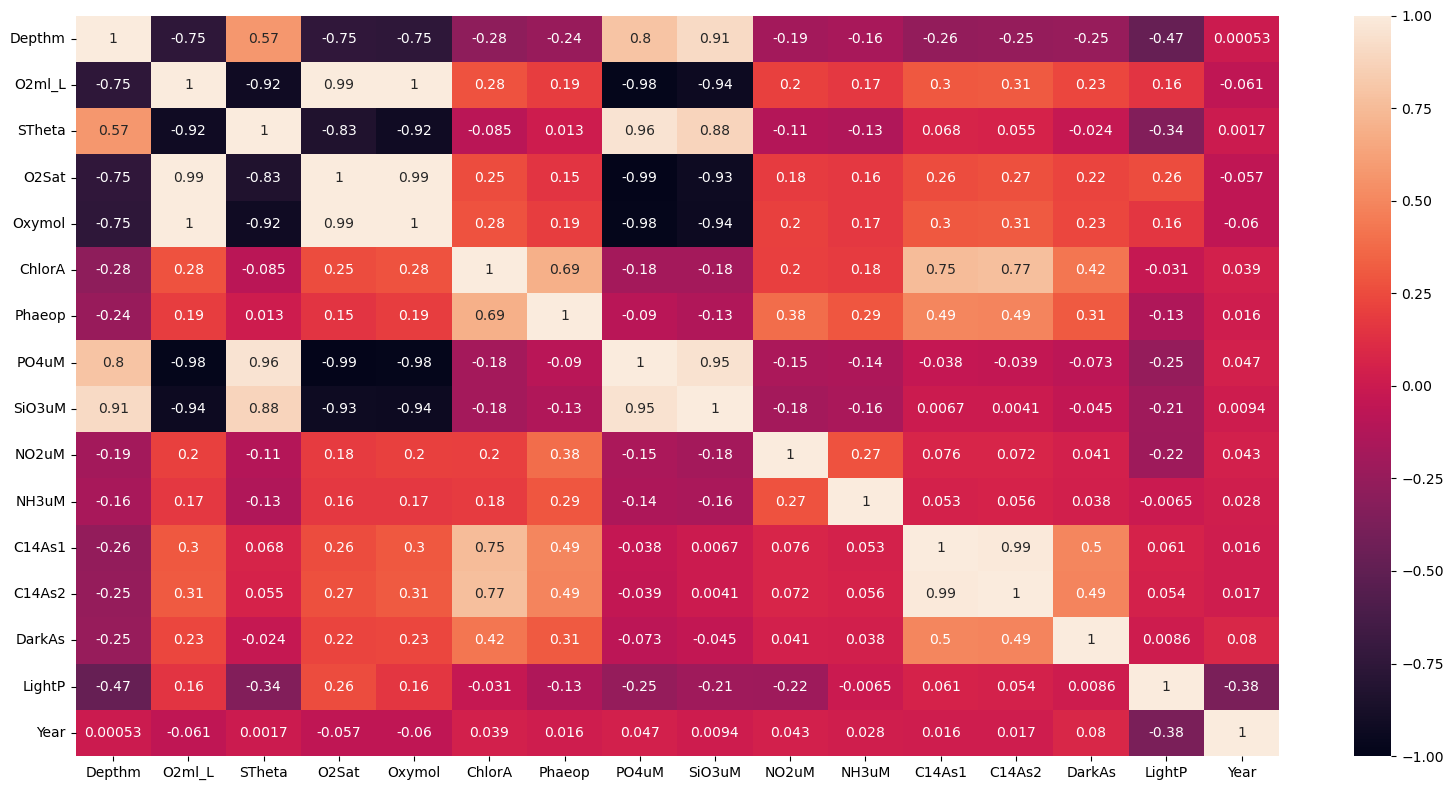

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix_df, vmin=-1, vmax=1, annot=True)  # Plots the heatmap of the correlation matrix
plt.tight_layout()
plt.show()

In [13]:
positive_corr_features = []  # list for storing the pairs of features that have high positive correlation
negative_corr_features = []  # list for storing the pairs of features that have high negative correlation

for i, col in enumerate(corr_matrix_df.columns):  # Traverse through the rows
    for j in range(i+1, corr_matrix_df[col].shape[0]):  # Traverse through the columns
        # Note: Starts from i+1 to avoid comparison with same features or features that have already been looked

        # High positive correlation if the correlation value is greater than 0.75
        if corr_matrix_df.iloc[j, i]>0.75:
            positive_corr_features.append((col, corr_matrix_df.index[j]))
            #print(f"{col} and {corr_matrix_df.index[j]} have a positive correlation")

        # High negative correlation if the correlation value is less than -0.75
        elif corr_matrix_df.iloc[j, i]<-0.75:
            negative_corr_features.append((col, corr_matrix_df.index[j]))
            #print(f"{col} and {corr_matrix_df.index[j]} have a negative correlation")

In [14]:
positive_corr_features

[('Depthm', 'PO4uM'),
 ('Depthm', 'SiO3uM'),
 ('O2ml_L', 'O2Sat'),
 ('O2ml_L', 'Oxymol'),
 ('STheta', 'PO4uM'),
 ('STheta', 'SiO3uM'),
 ('O2Sat', 'Oxymol'),
 ('ChlorA', 'C14As1'),
 ('ChlorA', 'C14As2'),
 ('PO4uM', 'SiO3uM'),
 ('C14As1', 'C14As2')]

1. The features `Depthm` and `STheta` seem to have high correlations with the columns `PO4uM` and `SiO3uM`. But the former two features are not correlated with each other. This indicates that the micromoles of *Phosphate* and *Silicate* increase as the depth/density increases. Hence we can drop the columns `PO4uM` and `SiO3uM` and keep the former two.

2. `O2ml_L` and `Oxymol` have a correlation value of 1. Based on the given information, it can be seen that `O2ml_L` is just another representation of `Oxymol` (different units of the same measurement). And from the scatterplot, we can see that`O2ml_L`, `O2Sat` and `Oxymol` have very similar relationships with the target variable. This makes sense, as all three columns indicate the level of oxygen present or its percentage of saturation. So, to reduce multicollinearity, 2 out of these 3 features can be removed.

3. Similarly, `ChlorA` seems to be correlated with `C14As1` and `C14As2`, both of which are nearly perfectly collinear with each other. Hence `ChlorA` can be kept and the other two columns can be dropped.

In [15]:
negative_corr_features

[('Depthm', 'O2ml_L'),
 ('Depthm', 'Oxymol'),
 ('O2ml_L', 'STheta'),
 ('O2ml_L', 'PO4uM'),
 ('O2ml_L', 'SiO3uM'),
 ('STheta', 'O2Sat'),
 ('STheta', 'Oxymol'),
 ('O2Sat', 'PO4uM'),
 ('O2Sat', 'SiO3uM'),
 ('Oxymol', 'PO4uM'),
 ('Oxymol', 'SiO3uM')]

1. Both the depth `Depthm` and density `STheta` are negatively correlated with the Oxygen level present in the seawater which perfectly makes sense. Hence The oxygen level column itself is dropped.

# Data Cleaning

## Feature Selection

This stage involves selection of features. Columns are dropped on several basis such as collinearity between features and percentage of null values present.

In [16]:
# Percentage of null values in each column
df.isna().sum()/df.shape[0]*100 

Depthm     0.000000
Salnty     0.888435
O2ml_L     7.892302
STheta     1.546821
O2Sat      8.079487
Oxymol     8.081338
ChlorA    35.722436
Phaeop    35.723361
PO4uM     10.724440
SiO3uM    10.455227
NO2uM     11.129340
NH3uM     79.967189
C14As1    95.549498
C14As2    95.555048
DarkAs    93.015561
LightP    94.248453
Year       0.000000
dtype: float64

The features `NH3uM`, `DarkAs` and `LightP` have more than (approx)80 percent values missing. And from the scatterplot and the pearson's correlation value, it is clear that these features have nearly zero impact on the target variable. Hence these three can be removed.

In [17]:
# List of columns to be dropped. Columns are chosen based on
# 1. Collinearity with other features (based on the results from previous section)
# 2. Columns that have more than 75 percentage of null values 
to_drop_cols = ['PO4uM', 'SiO3uM', 'O2ml_L', 'Oxymol', 'O2Sat', 'C14As1', 'C14As2', 'NH3uM', 'DarkAs', 'LightP']
pre_proc_df_v2 = df.drop(to_drop_cols, axis=1)

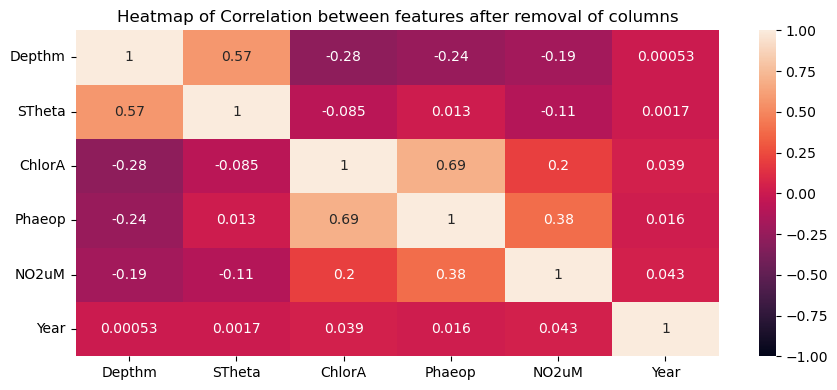

In [18]:
plt.figure(figsize=(9, 4))
sns.heatmap(pre_proc_df_v2.drop(['Salnty'], axis=1).corr(), vmin=-1, vmax=1, annot=True) # Heatmap of the presently available cols
plt.title("Heatmap of Correlation between features after removal of columns")
plt.tight_layout()
plt.show()

In [19]:
# Remaining columns and their percentage of null values
pre_proc_df_v2.isna().sum()/pre_proc_df_v2.shape[0]*100

Depthm     0.000000
Salnty     0.888435
STheta     1.546821
ChlorA    35.722436
Phaeop    35.723361
NO2uM     11.129340
Year       0.000000
dtype: float64

In [20]:
pre_proc_df_v2.describe()

,Depthm,Salnty,STheta,ChlorA,Phaeop,NO2uM,Year
count,324278.000000,321397.000000,319262.000000,208438.000000,208435.000000,288188.000000,324278.000000
mean,165.178424,33.702366,25.687714,0.441269,0.191023,0.041114,1997.329298
std,193.864870,0.403386,1.219238,1.158728,0.281638,0.102868,10.439800
min,0.000000,28.431000,20.934000,-0.001000,-3.890000,0.000000,1980.000000
25%,32.000000,33.390000,24.856345,0.050000,0.050000,0.000000,1988.000000
50%,100.000000,33.668000,25.806000,0.160000,0.110000,0.010000,1997.000000
75%,250.000000,34.071000,26.545000,0.390000,0.230000,0.030000,2006.000000
max,4442.000000,37.034000,250.784000,66.110000,10.660000,8.190000,2016.000000


## In depth analysis of features to handle missing values

`Depthm` has no null values.

### Salnty

`Salnty` is the target column and the number of rows with missing values in this column is also very low. Hence we can drop the rows with missing values instead of trying to fill them.

In [21]:
# Dropping rows that have null values in the target column
pre_proc_df_v2 = pre_proc_df_v2.dropna(subset=['Salnty'], axis=0)

### STheta

About 0.01% of values are higher than 50


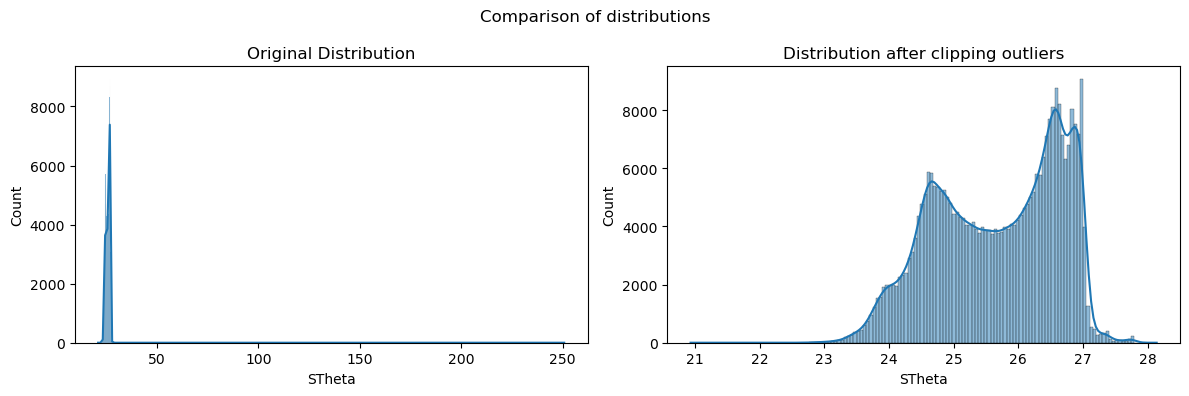

In [22]:
# Removing the outliers from this STheta columns and analyzing the rest of the observations
s_theta_df = pre_proc_df_v2[pre_proc_df_v2['STheta']<50]

# Percentage of rows that are outliers
perc_of_outliers = (pre_proc_df_v2.shape[0] - s_theta_df.shape[0])/pre_proc_df_v2.shape[0]
print(f"About {round(perc_of_outliers, 2)}% of values are higher than 50")

# Plots to compare original and transformed distribution (after removal of outliers)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes = axes.flatten()

# Original feature's Histogram
sns.histplot(data=pre_proc_df_v2, x='STheta', kde=True, ax=axes[0])
axes[0].set_title("Original Distribution")

# Transformed feature's Histogram
sns.histplot(data=s_theta_df, x='STheta', kde=True, ax=axes[1])
axes[1].set_title("Distribution after clipping outliers")

plt.suptitle("Comparison of distributions")
plt.tight_layout()
plt.show()

Here we can assume that the 0.02% (or 3 points) of `STheta` values that are greater than 50 are outliers (or possibly wrong values), because the typical densities for seawater are only slightly higher: 1020 to 1050 kg/m^3, with most of this range being due to pressure. The range of densities at the sea surface is about 1020 to 1029 kg/m^3. ([Source](http://sam.ucsd.edu/ltalley/sio210/PPSW/index.html)).

Now based on the histogram, we can use the mean value or median value to fill in the null values. (Both of them are fairly equal based on the .describe() results)

In [23]:
# Filling the null values with mean
pre_proc_df_v2['STheta'] = pre_proc_df_v2['STheta'].fillna(pre_proc_df_v2['STheta'].mean())

### ChlorA

From this [source](https://en.wiktionary.org/wiki/phaeopigment), we can see that the Phaeopigment component indicated by the feature `Phaeop` is a degradation product of chlorophyll that is indicated by the feature `ChlorA`. This indicates a high possibility of correlation between these features. Based on our heatmap result, we have also seen that these features are correlated with a value 0.69.

But from the very first scatterplot, we have also seen that there are negative values for the measurement of `Phaeop`, which is skeptical because Micrograms (measured fluormetrically) cannot be negative since they are used to quantify the concentration of substances based on their fluorescence properties. Hence we can re-analyze these two features to get a clear view.

Correlation between ChlorA and Phaeop features: 0.72


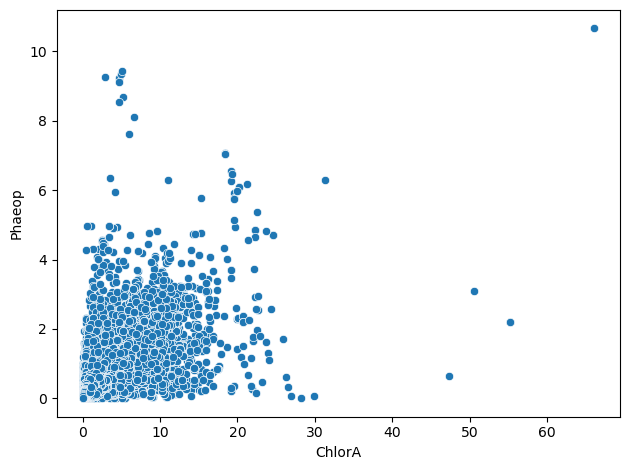

In [24]:
# Removal of negative/wrong measurements 
chlor_phaeop_df = pre_proc_df_v2[pre_proc_df_v2['Phaeop']>0]

# Recomputing the correlation value between these features
print(f"Correlation between ChlorA and Phaeop features: \
{round(np.corrcoef(chlor_phaeop_df['ChlorA'], chlor_phaeop_df['Phaeop'])[0][1], 2)}")

# Scatterplot between ChlorA and Phaeop for patterns
sns.scatterplot(data=chlor_phaeop_df, x='ChlorA', y='Phaeop')
plt.tight_layout()
plt.show()

Since the correlation coefficient is 0.72, which indicates the potential multicollinearity that may arise, one of these two features has been removed. This correlation is also supported by the definition of `Phaeop`, cited above.

In [25]:
# Dropping Phaeop col as it is highly correlated with ChlorA
pre_proc_df_v2 = pre_proc_df_v2.drop(['Phaeop'], axis=1)

In [26]:
# Year wise mean for the rest of the two cols
pre_proc_df_v2.groupby('Year', as_index=False)[['ChlorA', 'NO2uM']].mean().head()

,Year,ChlorA,NO2uM
0,1980,NaN,NaN
1,1981,0.576501,0.071334
2,1982,NaN,NaN
3,1983,0.221876,0.008647
4,1984,0.350197,0.032533


From this we can see that, there are 2 years worth record of data, that do not have any ChlorA or NO2uM (the other feature with missing values) recordings.

In [27]:
# Percentage of total rows that are in the year 1980 and 1982
((pre_proc_df_v2[pre_proc_df_v2['Year']==1980].shape[0] + pre_proc_df_v2[pre_proc_df_v2['Year']==1982].shape[0])/pre_proc_df_v2.shape[0])*100

0.4894258502724045

Since these two years together only make up to less than 0.5% of the entire data, they can be dropped.

In [28]:
# Dropping those two years
pre_proc_df_v2 = pre_proc_df_v2[(pre_proc_df_v2['Year']!=1980) & (pre_proc_df_v2['Year']!=1982)].reset_index(drop=True)

Still there are about 35% of the data missing. Dropping them might lead to loss of information. Hence we can use a suitable measure to fill in the null values.

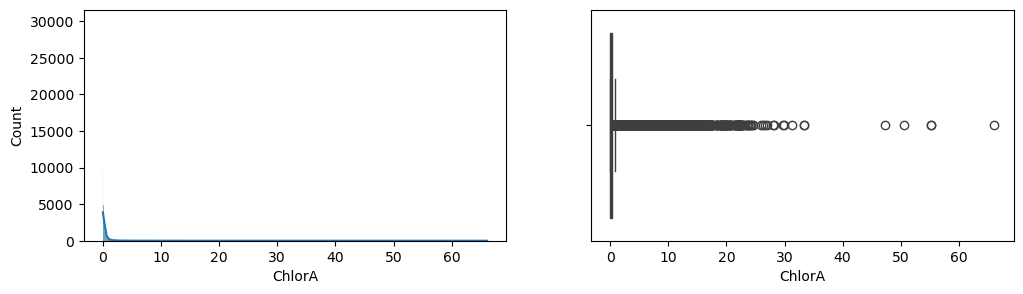

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes = axes.flatten()

# Distribution of ChlorA
sns.histplot(data=pre_proc_df_v2, x='ChlorA', kde=True, ax=axes[0])
sns.boxplot(data=pre_proc_df_v2, x='ChlorA', ax=axes[1])
plt.show()

From the histogram and boxplot of this feature, we can see that there are a lot of outliers that might affect this value. Hence we can use the median to fill in the null values.

In [30]:
# Computing year wise distribution to find the right central measure to fill in null values
year_wise_distribution = pre_proc_df_v2.groupby('Year', as_index=False)[['ChlorA']].agg(['mean', 'median'])
year_wise_distribution.head()

Year    ChlorA       
             mean median
0  1981  0.576501   0.12
1  1983  0.221876   0.13
2  1984  0.350197   0.13
3  1985  0.440114   0.16
4  1986  0.348350   0.15

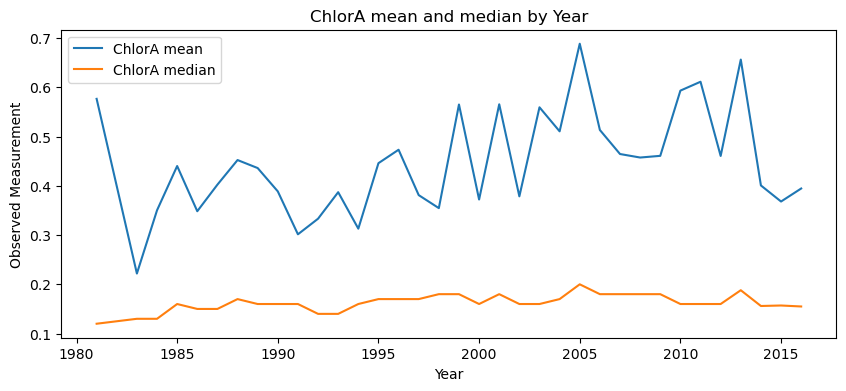

In [31]:
# Plot the mean and median of ChlorA column year-wise
plt.figure(figsize=(10, 4))
plt.plot(year_wise_distribution['Year'], year_wise_distribution['ChlorA']['mean'], label='ChlorA mean')
plt.plot(year_wise_distribution['Year'], year_wise_distribution['ChlorA']['median'], label='ChlorA median')
plt.ylabel('Observed Measurement')
plt.xlabel('Year')
plt.title('ChlorA mean and median by Year')
plt.legend()
plt.show()

This plot further allows us to confirm that median might be the right measure to fill in the null values. because median is fairly constant over the years unlike the mean. 

In [32]:
# Filling null values with median
pre_proc_df_v2['ChlorA'] = pre_proc_df_v2['ChlorA'].fillna(pre_proc_df_v2['ChlorA'].median())

### NO2uM

In [33]:
# Remaining percentage of null values
pre_proc_df_v2.isna().sum()/pre_proc_df_v2.shape[0]

Depthm    0.000000
Salnty    0.000000
STheta    0.000000
ChlorA    0.000000
NO2uM     0.101462
Year      0.000000
dtype: float64

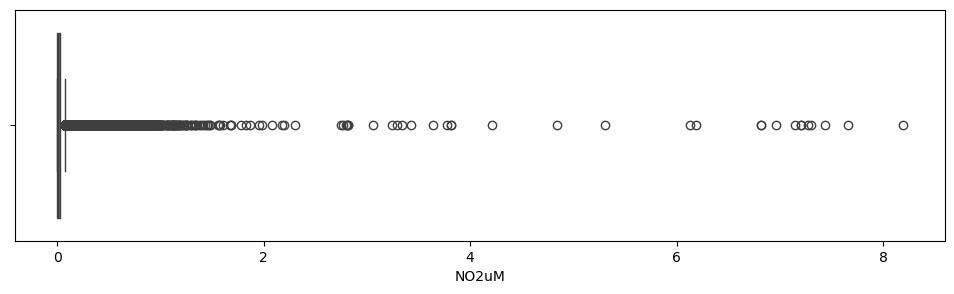

In [34]:
# Distribution of NO2uM column
plt.figure(figsize=(12, 3))
sns.boxplot(data=pre_proc_df_v2, x='NO2uM')
plt.show()

Since there are a lot of outliers and only less than 0.1% values missing, we can drop these rows instead of trying to fill them.

In [35]:
# Dropping these rows
pre_proc_df_v2 = pre_proc_df_v2.dropna(subset=['NO2uM'], axis=0)

## Train Test Split

In [36]:
# The training data will include samples collected between 1980 to 2010
train = pre_proc_df_v2[(pre_proc_df_v2['Year']>=1980)&(pre_proc_df_v2['Year']<=2010)]
X_train, y_train = train.drop(['Salnty'], axis=1).values, train['Salnty'].values

# The development/validation data will include samples collected between 2011 to 2013
val = pre_proc_df_v2[(pre_proc_df_v2['Year']>=2011)&(pre_proc_df_v2['Year']<=2013)]
X_val, y_val = val.drop(['Salnty'], axis=1).values, val['Salnty'].values

#  the testing data will include samples collected between 2014 to 2016
test = pre_proc_df_v2[(pre_proc_df_v2['Year']>=2014)&(pre_proc_df_v2['Year']<=2016)]
X_test, y_test = test.drop(['Salnty'], axis=1).values, test['Salnty'].values

In [37]:
# Scaling the training and validation datasets
scaler = StandardScaler()  # Inititalize the StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and Transform the training dataset
X_val_scaled = scaler.transform(X_val)  # Transform the validation dataset

In [38]:
# Concatenating training and validation dataset
X_total = np.concatenate((X_train, X_val), axis=0)
y_total = np.concatenate((y_train, y_val), axis=None)

# Scaling the concatenated training and test datasets
scaler = StandardScaler()  # Inititalize the StandardScaler object
X_total_scaled = scaler.fit_transform(X_total)  # Fit and Transform the concatenated dataset for training
X_test_scaled = scaler.transform(X_test)  # Transform the test dataset

## Linear Regression on Selected features

Since Linear Regression does not have any hyper-parameters, we can use the test set directly.

In [39]:
# Training and Evaluation based on prediction
lin_reg_model = LinearRegression(fit_intercept=True) # Inititalize the model
lin_reg_model.fit(X_total_scaled, y_total)  # Train the model
y_pred = lin_reg_model.predict(X_test_scaled)  # Predict using the trained model

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")  # Mean Absolute Error
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.14663863957837803
R2 Score: 0.7568074136046037


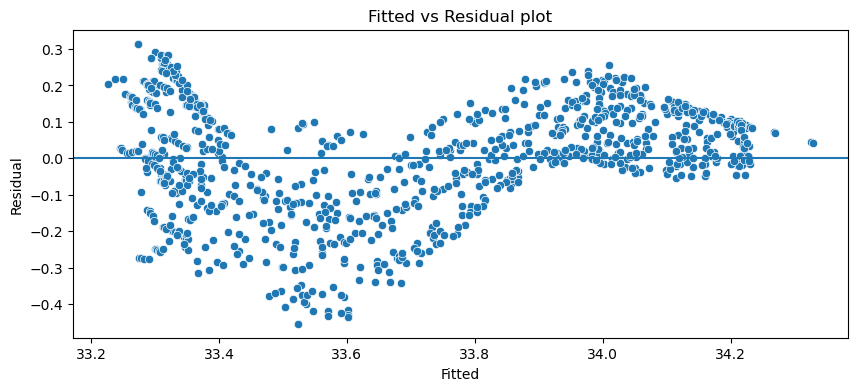

In [40]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred[0:1000], y=y_test[0:1000]-y_pred[0:1000])
plt.axhline(y=0)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.show()

The prescence of non-uniform variance and a pattern over the fitted vs residual plot indicate the prescence of non-linearity in the data. This might be the cause of the negative R squared.

## Non-linear Regression

In [41]:
# List of columns
pre_proc_df_v2.columns

Index(['Depthm', 'Salnty', 'STheta', 'ChlorA', 'NO2uM', 'Year'], dtype='object')

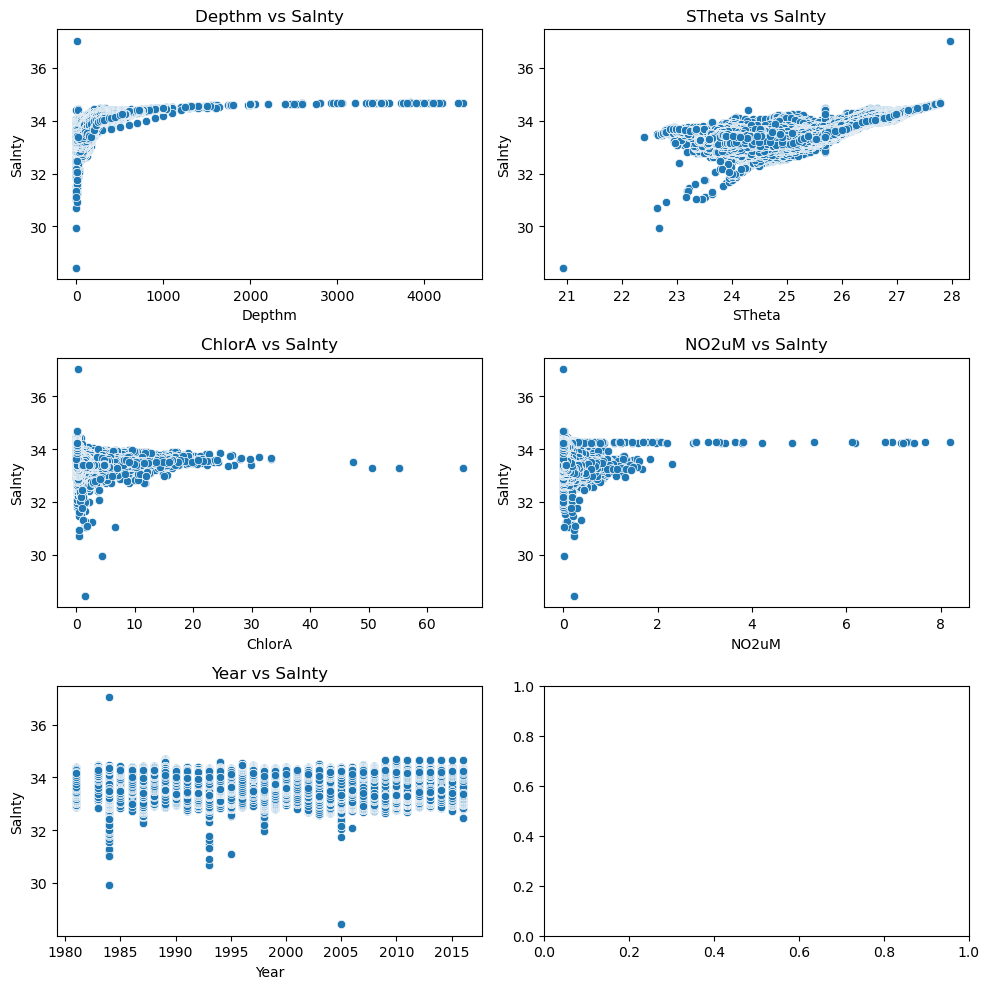

In [42]:
target_col = 'Salnty'
features = ['Depthm', 'STheta', 'ChlorA', 'NO2uM', 'Year']

# Re-plotting the scatter plots to visualize the relationship between the features and target column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.scatterplot(data = pre_proc_df_v2, 
                    x=pre_proc_df_v2[col], 
                    y=pre_proc_df_v2[target_col], 
                    ax=axes[i])  # Scatter plot of feature vs outcome
    axes[i].set_title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()

Based on the above graphs, we can see that the relationship between `Depthm` and `Salnty` looks like a logarithmic relationship. Hence a logarithmic transformation might be used.

The other features are fairly linear.

### Manual non-linear transformation of dataset

In [43]:
# Taking the logarithm of the Depth feature to introduce non-linearity in the model
pre_proc_df_v2['Depthm_transformed'] = np.log1p(pre_proc_df_v2['Depthm'])
pre_proc_df_v2 = pre_proc_df_v2.drop(['Depthm'], axis=1)

In [44]:
# The training data will include samples collected between 1980 to 2010
train = pre_proc_df_v2[(pre_proc_df_v2['Year']>=1980)&(pre_proc_df_v2['Year']<=2010)]
X_train_log, y_train_log = train.drop(['Salnty'], axis=1).values, train['Salnty'].values

# The development/validation data will include samples collected between 2011 to 2013
val = pre_proc_df_v2[(pre_proc_df_v2['Year']>=2011)&(pre_proc_df_v2['Year']<=2013)]
X_val_log, y_val_log = val.drop(['Salnty'], axis=1).values, val['Salnty'].values

#  the testing data will include samples collected between 2014 to 2016
test = pre_proc_df_v2[(pre_proc_df_v2['Year']>=2014)&(pre_proc_df_v2['Year']<=2016)]
X_test_log, y_test_log = test.drop(['Salnty'], axis=1).values, test['Salnty'].values

In [45]:
# Scaling the training and validation datasets
scaler = StandardScaler()  # Inititalize the StandardScaler object
X_train_scaled_log = scaler.fit_transform(X_train_log)  # Fit and Transform the training dataset
X_val_scaled_log = scaler.transform(X_val_log)  # Transform the validation dataset

In [46]:
# Concatenating training and validation dataset
X_total_log = np.concatenate((X_train_log, X_val_log), axis=0)
y_total_log = np.concatenate((y_train_log, y_val_log), axis=None)

# Scaling the concatenated training and test datasets
scaler = StandardScaler()  # Inititalize the StandardScaler object
X_total_scaled_log = scaler.fit_transform(X_total_log)  # Fit and Transform the concatenated dataset for training
X_test_scaled_log = scaler.transform(X_test_log)  # Transform the test dataset

### Linear Regression on the transformed dataset


Similar to the previous part, since there are no hyper-parameters, test data is directly used.

In [47]:
# Training and Evaluation based on prediction
lin_reg_model = LinearRegression(fit_intercept=True) # Inititalize the model
lin_reg_model.fit(X_total_scaled_log, y_total_log)  # Train the model
y_pred = lin_reg_model.predict(X_test_scaled_log)  # Predict using the trained model

print(f"Mean Absolute Error: {mean_absolute_error(y_test_log, y_pred)}")  # Mean Absolute Error
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.15513258737275182
R2 Score: 0.7319952724280772


The MAE does not seem to improve a lot. Hence we can say

1. Either this non-linear relationship is not enough
2. Linear Regression can better fit the model (Most probably not this option).

To test this, we can try Polynomial features and try different degrees.

### Hyper-parameter tuning for Non Linear Regression

In [48]:
# Number of Degrees tested
degrees = 10
mae_list = []  # List to store the mean absolute errors for different degrees

for d in range(2, degrees):

    # Create polynomial features based on the degree provided
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X_train_scaled)

    # Fit the model on train dataset
    model = LinearRegression(fit_intercept=True)
    model.fit(poly_features,y_train)

    # Predict for the validation dataset and compute mae
    y_pred = model.predict(polynomial_converter.transform(X_val_scaled))
    mae = mean_absolute_error(y_val, y_pred)
    mae_list.append(mae)  # Append the mae to the mae list
    
    print(f"Non Linear Regression for degree {d} completed with mean absolute error {mae}.") 

Non Linear Regression for degree 2 completed with mean absolute error 0.0950076471515916.
Non Linear Regression for degree 3 completed with mean absolute error 0.10027214787697149.
Non Linear Regression for degree 4 completed with mean absolute error 0.14434084224068813.
Non Linear Regression for degree 5 completed with mean absolute error 0.5780736564103945.
Non Linear Regression for degree 6 completed with mean absolute error 8.459114989755225.
Non Linear Regression for degree 7 completed with mean absolute error 305.8993298222155.
Non Linear Regression for degree 8 completed with mean absolute error 7971.984360053977.
Non Linear Regression for degree 9 completed with mean absolute error 306115.6178622359.


Degree 2 and 3 seem to yield the least Mean Absolute Error.

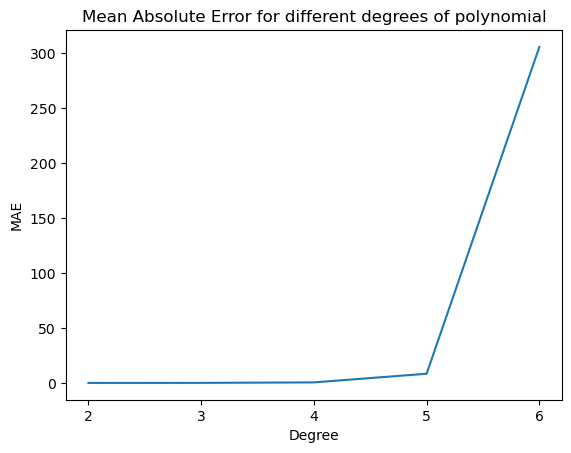

In [49]:
# Plot to visualize different mae values for different degrees
plt.figure()
plt.plot(np.arange(2, 7), mae_list[1:6])
plt.xticks(np.arange(2, 7, 1))
plt.title("Mean Absolute Error for different degrees of polynomial")
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.show()

Degree 2 polynomial seems yield the least MAE. This seem to produce the least error.

### Prediction on test dataset

In [50]:
# Transforming data using the best degree found
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X_total_scaled)

# Training the model
model = LinearRegression(fit_intercept=True)
model.fit(poly_features,y_total)

# Making predictions and computing the MAE
y_pred = model.predict(polynomial_converter.transform(X_test_scaled))
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.10852626661584076
R2 Score: 0.8695429179041679


From this we can confidently say that a non linear polynomial regression model with **degree 2** is the best fit for this specific subset of selected features - \[`Depthm`, `STheta`, `ChlorA`, `NO2uM`, `Year`] and the target variable `Salnty`.

## Interpreting the results/prediction in a bigger picture

The intention of this project is to use machine learning for informing climate change. But how does this predicted Salinity levels allow us to inform about climate change?

Levels of salinity are significant for two reasons. 

1. Salinity a direct impact on seawater density (salty water is denser than freshwater), which in turn affects the movement of ocean currents from the tropics to the poles, along with temperature. The way heat is transported across the oceans is ultimately controlled by these currents, which also affect global temperature.
2. The amount of freshwater that evaporates and precipitates into the oceans, as well as the Earth's total water cycle, are directly related to sea surface salinity. One technique to look more closely at the water cycle is to measure salinity.

Because, of these two reasons, the values of Salinity is very important. Now using our model, we can predict the Salinity level at the surface of the ocean in a certain region and can use it inform more information about the Earth's water cycle. Thus our model can be seen as a small piece of information that can help experts in predicting the global temperature. Educational institutions can also make use of the available information to conduct more research on this.

Reference: [With a Pinch of salt](https://climate.nasa.gov/news/58/with-a-pinch-of-salt/)